In [3]:
#hide
from utils import *
hc(
    "On Musical Onset Detection via the S-Transform",
    [""],
    "https://arxiv.org/abs/1712.02567"
)

# Quest

1. Write about the questions that will be answered in the notebook.

# Author(s)

Silva et. al.

# Algorithm - 1 (Onset Envelopes By Band Splitting)

In [2]:
import modusa as ms
import numpy as np
import librosa

# ----- Parameters (Algorithm 1) ----
# The parameters are set as per the 
# suggested values in the paper.

audio_fp = "../../../data/samples/Sample Song.mp3"
SR = 44100 # Hz
D = 40 # Downsampling factor => sr = 1102.5 hz
K = 200 # Subband size => 
# ---------

## Loading Audio Signal

We load a song for whose tempo is already known to me. I am loading a 4 sec clip with high percussive elements presence.

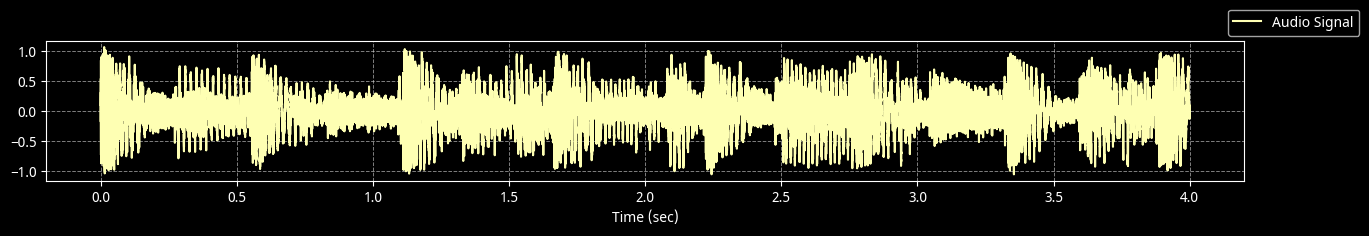

In [3]:
# Load an audio signal
x, sr, title = ms.load(audio_fp, sr=SR, clip=(70, 74)) # 4 seconds is chosen as per the author

# Visualisation
fig = ms.fig("s")
fig.add_signal(x, np.arange(x.size) / sr, label="Audio Signal")
fig.add_xlabel("Time (sec)")
fig.add_legend()

## Downsampling

The authors suggest to downsample the audio signal with a factor of 40. This is really weird and I really want to see if the algorithm will work.

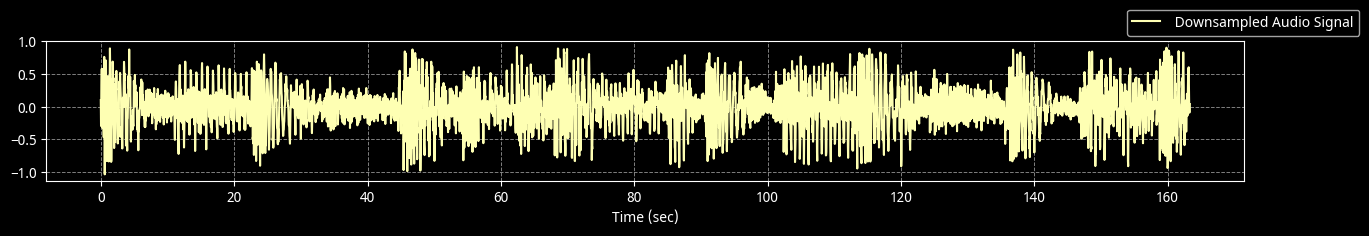

In [5]:
y = x[::D]
sr = sr // D

# Visualization
fig = ms.fig("s")
fig.add_signal(y, np.arange(y.size) / sr, label=" Downsampled Audio Signal")
fig.add_xlabel("Time (sec)")
fig.add_legend()

## Discrete Fourier Transform

In [7]:
N = y.size
M = y.size

Y = np.zeros(M, dtype=np.complex64)
ns = np.arange(N)
ks = np.arange(M)

for k in ks:
    exp_term = np.exp(-2j * np.pi * ns * k / M)
    Y[k] = (1 / M) * np.sum(y * exp_term)

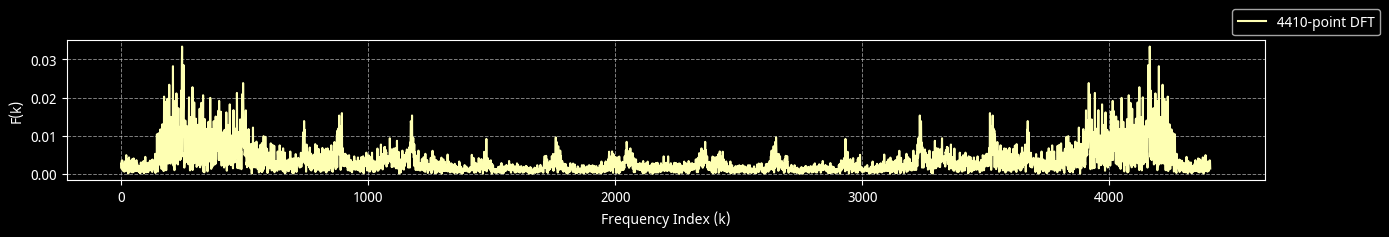

In [8]:
fig = ms.fig("s")
fig.add_signal(np.abs(Y), label=f"{M}-point DFT", ylabel="F(k)")
fig.add_xlabel("Frequency Index (k)")
fig.add_legend()

## Discrete S-Transform

In [ ]:
M = Y.size
F = np.zeros((M//2, M))

#--- Naive Implementation ---
ms = np.arange(M)

for p in range(F.shape[0]):
    for n in range(F.shape[1]):
        # Case: n=0
        if n == 0:
            F[p, n] = np.mean(y)
    
        # Case: n != 0
        else:
            tmp = 0j
            for m in range(M):
                if m + n < Y.size:
                    Y_shifted = Y[m+n]
                else:
                    Y_shifted = 0j
                phi_1 = (2j * np.pi * m * p) / (N)
                phi_2 = -(2 * ((np.pi * m) / (n))**2)
                exp_term = np.exp(phi_1 + phi_2)
                tmp += Y_shifted * exp_term
                
            F[p, n] = tmp

# Notebook Contributors

Ankit Anand

# Appendix

## S Transform

[source](https://www.kurims.kyoto-u.ac.jp/~kyodo/kokyuroku/contents/pdf/2102-01.pdf)